
# Project: Investigating the TMDB Movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, i plan to conduct an analysis of movies data to gain some insights about certain features/properties of movies, and to provide answers to some specific questions. The dataset to used for this analysis was collected from **The Movie Dataset (TMDB)**, it contains information about 10,000 movies, including genre, ratings, budget, and revenue.

**This analysis aims to answer the following questions;**
1. What genres are popular/highy rated/profitable?
2. What kinds of properties are associated with movies that earn high revenues?
3. By how much has the number of movies released increased/decreased from 1960 till 2015? 
4. What is the relationship between movie runtime and movie rating?
5. What is the distribution of movie popularity and rating(vote_average) in the dataset?
                

### Importing all needed packages

>Before analysis, I always prefer to import all the packages i would need. Later in the analysis, If i need to use any package that i had not imported, I will just add another import statement here. 
I also plan to embed all visualizations, by making use of the matplotlib magic keyword.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Accessing and inspecting the dataset
>The dataset for this analysis is saved in the current working directory as "tmdb-movies.csv".

In [2]:
movies = pd.read_csv("tmdb-movies.csv") #Read the data from the csv file
movies.head() #displaying the first five rows of the data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


From the dataframe above, it can be observed that the 'cast', 'genres', and 'production_companies' columns contain multiple values separated by pipe '|' characters.

In [3]:
movies.shape #Exploring the shape of the dataset

(10866, 21)

From the above result, the dataframe contains a total of 10,865 rows, and 21 columns.<br> Next, let's inspect the properties of the dataframe.

In [4]:
movies.info() #Exploring the properties of the columns in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The dataframe contains values of datatypes; integer, float and string. One can also notice that some columns contain null values. 
Next, i need to get a list of all the column names, and the row indexes.

In [5]:
movies.columns #displays a list of all column names

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
movies.index #displays the range indexes of rows

RangeIndex(start=0, stop=10866, step=1)

The two preceding code cells return the list of all the column names, and the row indexes.


### Data Cleaning and preparation

After accessing and inspecting the dataset, the following data cleaning/preparation steps need to be taken, depending on our goals;
1. Checking for and dealing with null values
2. Checking for and getting rid of any duplicate records
3. Dropping irrelevant columns
4. Ensuring that values in all the needed colums are of the right data type
5. Investigating summary statistics

#### Checking for and dealing with null values

In [7]:
movies.isna().sum() #checks and returns the number of null values in each field

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Of all the columns containing null values, my concern is with the 'cast' and 'genres' columns. I intend to fill the missing values in those columns, with "Not available".

In [8]:
#fills the null values in the relevant columns with Not available
movies["cast"].fillna("Not available", inplace=True)
movies["genres"].fillna("Not available", inplace=True)

The code cell above fills the missing values in the 'cast' and 'genres' columns, with "Not available.

#### Checking for duplicate records

In [9]:
movies.duplicated().sum() #checks and returns a sum of duplicated records in the data

1

In [10]:
movies.duplicated(subset="id").sum() #checks again on a subset of the data, to confirm the above result

1

There is only one duplicate record in the dataset.

In [11]:
movies.drop_duplicates(inplace=True) #dropping the duplicate record

The above code cell removes the duplicate record.

#### Dropping irrelevant columns

Based on the aim of this analysis project, some columns in the dataset are not relevant to the aim, and they need to be dropped, so as to enhance focus on the needed columns.

In [12]:
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [13]:
#putting all the irrelevant volumn names in a list
irrelevant_columns = ['imdb_id', 'homepage', 'director', 'tagline', 
                      'keywords', 'overview',             
                      'production_companies']

movies.drop(irrelevant_columns, axis=1, inplace=True) #dropping the irrelevant columns

In [14]:
movies.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Perfect, all the irrelevant columns have been removed.

#### Correcting incorrect data types

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   cast            10865 non-null  object 
 6   runtime         10865 non-null  int64  
 7   genres          10865 non-null  object 
 8   release_date    10865 non-null  object 
 9   vote_count      10865 non-null  int64  
 10  vote_average    10865 non-null  float64
 11  release_year    10865 non-null  int64  
 12  budget_adj      10865 non-null  float64
 13  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


The values in the 'release_date' column are of the string data type instead of the datetime data type. I would use the .to_datetime method in pandas to convert from the string to the datetime data type.

In [16]:
movies["release_date"] = pd.to_datetime(movies["release_date"])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          10865 non-null  int64         
 3   revenue         10865 non-null  int64         
 4   original_title  10865 non-null  object        
 5   cast            10865 non-null  object        
 6   runtime         10865 non-null  int64         
 7   genres          10865 non-null  object        
 8   release_date    10865 non-null  datetime64[ns]
 9   vote_count      10865 non-null  int64         
 10  vote_average    10865 non-null  float64       
 11  release_year    10865 non-null  int64         
 12  budget_adj      10865 non-null  float64       
 13  revenue_adj     10865 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)


#### Investigating summary statistics

Lastly, we need to investigate the summary statistics of the dataset, to identify any outliers or anomalies.

In [17]:
movies.describe() #displaying summary statistics

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the above, we can see that the minimum value for buget, revenue and runtime is 0. This value is not reasonable, and hence must be cleaned.

In [18]:
index_error = movies.query("budget==0 or revenue==0 or runtime==0").index  #cleaning the data
movies.drop(index_error, axis=0, inplace=True)

In [19]:
#displaying the summary statistics again
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


All done!!<br>
Next up, I would conduct an exploratory data analysis, to gain insights from the dataset.

<a id='eda'></a>
## Exploratory Data Analysis

### What genres are popular/highly rated/profitable?

To answer this question, first of all, I need to extract the relevant columns; genres, popularity, vote_average, and revenue

In [20]:
movies_genres = movies[["genres", "popularity", "vote_average", "revenue"]] #Extracting the needed columns
movies_genres.head() #displaying the first five rows

,genres,popularity,vote_average,revenue
0,Action|Adventure|Science Fiction|Thriller,32.985763,6.5,1513528810
1,Action|Adventure|Science Fiction|Thriller,28.419936,7.1,378436354
2,Adventure|Science Fiction|Thriller,13.112507,6.3,295238201
3,Action|Adventure|Science Fiction|Fantasy,11.173104,7.5,2068178225
4,Action|Crime|Thriller,9.335014,7.3,1506249360


In [21]:
def chainer(s):  #Return a list from series of '|'- separated strings
    return list(chain.from_iterable(s.str.split('|')))

lens = movies_genres["genres"].str.split('|').map(len)  #Calculate lengths of splits

#Creating a new dataframe, repeating or chaining appropriately
movies_genres = pd.DataFrame({"genres": chainer(movies_genres["genres"]),
                               "popularity": np.repeat(movies_genres["popularity"], lens),
                               "vote_average": np.repeat(movies_genres["vote_average"], lens),
                               "revenue": np.repeat(movies_genres["revenue"], lens)})

movies_genres.head() #displaying the first five rows

,genres,popularity,vote_average,revenue
0,Action,32.985763,6.5,1513528810
0,Adventure,32.985763,6.5,1513528810
0,Science Fiction,32.985763,6.5,1513528810
0,Thriller,32.985763,6.5,1513528810
1,Action,28.419936,7.1,378436354


The above cell splits the necessary values in the genres column.<br>
Next up, I need to calculate the mean popularity for each genre.

In [22]:
#Calculating the mean popularity for each genre, and sorting by it in ascending order
genre_popularity = movies_genres.groupby("genres", as_index=False)["popularity"].mean()
genre_popularity = genre_popularity.sort_values("popularity", ascending=True)
genre_popularity.head()

,genres,popularity
9,Foreign,0.179608
16,TV Movie,0.273628
5,Documentary,0.294458
11,Horror,0.854005
12,Music,0.899005


To gain insights from the above, I would create a horizontal bar chart showing the mean popularity  for each genre.

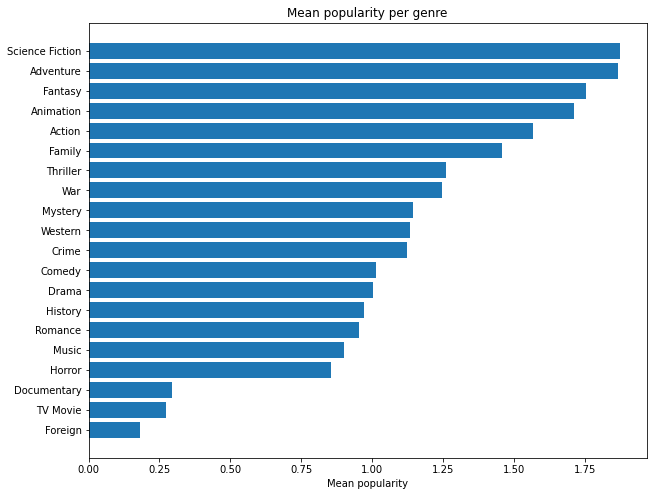

In [23]:
plt.barh(genre_popularity.genres, genre_popularity.popularity)  #plotting the horizontal bar chart
figure = plt.gcf()  #getting the current plot
figure.set_size_inches(10, 8)  #adjusting the size of the current plot
plt.xlabel("Mean popularity")
plt.title("Mean popularity per genre")
plt.show()

Wow!! It is obvious from the above, that science fiction is the most popular genre,<br> followed slightly by adventure, and then fantasy and animation.
Also, the least popular genres are documentary, tv movie, and foreign.<br>
Next up, I need to calculate the mean rating for each genre.

In [24]:
#Calculating the mean rating for each genre, and sorting by it in ascending order
genre_rating = movies_genres.groupby("genres", as_index=False)["vote_average"].mean()
genre_rating = genre_rating.sort_values("vote_average", ascending=True)
genre_rating.head()

,genres,vote_average
16,TV Movie,5.600000
11,Horror,5.710799
3,Comedy,6.026436
15,Science Fiction,6.029287
0,Action,6.036959


To gain insights from the above, I would create a horizontal bar chart showing the mean rating for each genre.

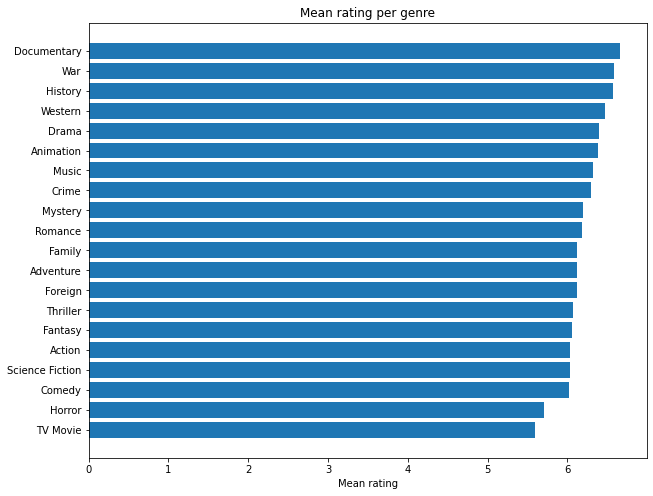

In [25]:
plt.barh(genre_rating.genres, genre_rating.vote_average)  #plotting the horizontal bar chart
figure = plt.gcf()  #getting the current plot
figure.set_size_inches(10, 8)  #adjusting the size of the current plot
plt.xlabel("Mean rating") 
plt.title("Mean rating per genre")
plt.show()

Interesting!! Although documentary was among the least popular genre, it turns out to be the highest rated genre.<br>
Next up, I need to calculate the mean revenue for each genre.

In [26]:
#Calculating the mean revenue for each genre, and sorting by it in ascending order
genre_revenue = movies_genres.groupby("genres", as_index=False)["revenue"].mean()
genre_revenue = genre_revenue.sort_values("revenue", ascending=True)
genre_revenue.head()

,genres,revenue
9,Foreign,1.111596e+07
5,Documentary,2.252440e+07
16,TV Movie,4.200000e+07
11,Horror,5.728780e+07
6,Drama,7.432727e+07


To gain insights from the above, I would create a horizontal bar chart showing the mean revenue for each genre.

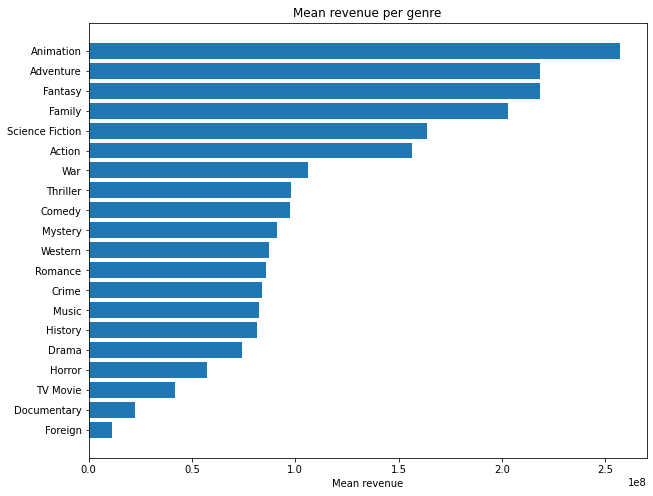

In [27]:
plt.barh(genre_revenue.genres, genre_revenue.revenue) #plotting the horizontal bar chart
figure = plt.gcf() #getting the current plot
figure.set_size_inches(10, 8)  #adjusting the size of the current plot
plt.xlabel("Mean revenue")
plt.title("Mean revenue per genre")
plt.show()

Interesting!! Animations are the highest revenue earning genre, followed by adventure, fantasy and family. <br>Although, documentary is the highest rated genre, it turns out that it generates low revenue.

### What kinds of properties are associated with movies that earn high revenues?

To answer this question, the meaning of high revenue should be defined.<br> In this context, we can define a high revenue as one which is higher than the 75th percentile of revenues. Let's calculate this.

In [28]:
high_revenue = movies.revenue.quantile(0.75)  #Getting the value at the 75th percentile of revenues

#filtering the movies data to return only movies with revenues higher than the 75th percentile
movies_high_revenue = movies[movies["revenue"] > high_revenue] 
movies_high_revenue.head() #displaying the first five rows

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


With this done, let's describe the summary statistics for this revenue column.

In [29]:
movies_high_revenue.revenue.describe() #displaying the summary statistics for the revenue column

count    9.640000e+02
mean     3.197611e+08
std      2.473609e+08
min      1.242721e+08
25%      1.653347e+08
50%      2.321503e+08
75%      3.682613e+08
max      2.781506e+09
Name: revenue, dtype: float64

We then need to determine the relationship/correlation between revenue(high revenue) and three other movie properties. To answer this question, three properties would be used. These properties are 'popularity', 'budget' and 'vote_average'.<br>
First of all, the relationship between high revenue and popularity would be determined using a scatter plot and a correlation calculation.

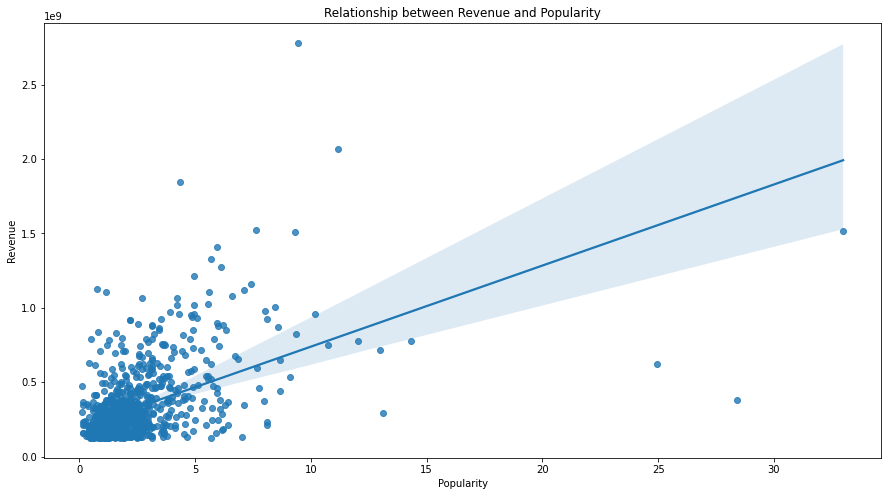

In [30]:
ax = sns.regplot(y="revenue", x = "popularity", data=movies_high_revenue) #plotting the scatter plot.
figure = plt.gcf() #Getting the current plot
figure.set_size_inches(15, 8) #adjusting the size of the current plot
plt.title("Relationship between Revenue and Popularity")
plt.xlabel("Popularity")
plt.ylabel("Revenue")
plt.show()

In [31]:
#Calculating the correlation between high revenue and popularity
movies_high_revenue[["revenue", "popularity"]].corr()

,revenue,popularity
revenue,1.000000,0.511673
popularity,0.511673,1.000000


This shows that the correlation between high revenue and popularity is 0.51. This is a relatively high correlation. The scatter plot with the regression line also shows this.<br>
Next, the relationship between high revenue and budget would be determined using the same methods.

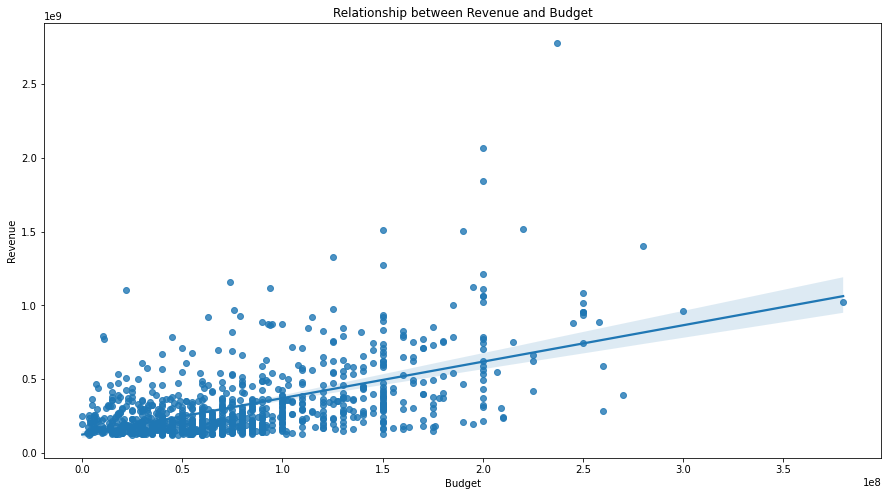

In [32]:
ax = sns.regplot(y="revenue", x = "budget", data=movies_high_revenue) #plotting the scatter plot.
figure = plt.gcf() #Getting the current plot
figure.set_size_inches(15, 8) #adjusting the size of the current plot
plt.title("Relationship between Revenue and Budget")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

In [33]:
#Calculating the correlation between high revenue and budget
movies_high_revenue[["revenue", "budget"]].corr()

,revenue,budget
revenue,1.00000,0.55703
budget,0.55703,1.00000


This shows that the correlation between high revenue and budget is approximately 0.56. This is a relatively high correlation. The scatter plot with the regression line also shows this.<br>
Next, the relationship between high revenue and vote_average(rating) would be determined using the same methods.

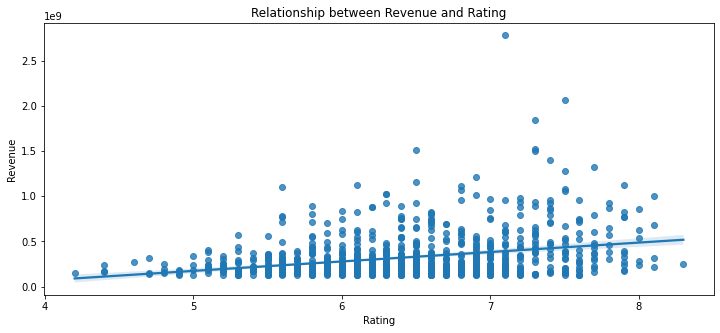

In [34]:
ax = sns.regplot(y="revenue", x = "vote_average", data=movies_high_revenue) #plotting the scatter plot.
figure = plt.gcf() #Getting the current plot
figure.set_size_inches(12, 5) #adjusting the size of the current plot
plt.title("Relationship between Revenue and Rating")
plt.xlabel("Rating")
plt.ylabel("Revenue")
plt.show()

In [35]:
#Calculating the correlation between high revenue and rating
movies_high_revenue[["revenue", "vote_average"]].corr()

,revenue,vote_average
revenue,1.000000,0.297338
vote_average,0.297338,1.000000


This shows that the correlation between high revenue and rating is approximately 0.29. This is a relatively low correlation. The scatter plot with the regression line also shows this.<br>
In summary, high revenue has a high positive correlation with popularity and budget, and a low positive correlation with rating. 

### By how much has the number of movies released increased/decreased from 1960 till 2015? 

To answer the above question, I would create a line chart showing the number of movies released per release year.

In [36]:
#Calculating the number of movies released in each year
movies_release_year = movies.groupby("release_year", as_index=False)["id"].count()
movies_release_year.head()

,release_year,id
0,1960,5
1,1961,10
2,1962,7
3,1963,6
4,1964,7


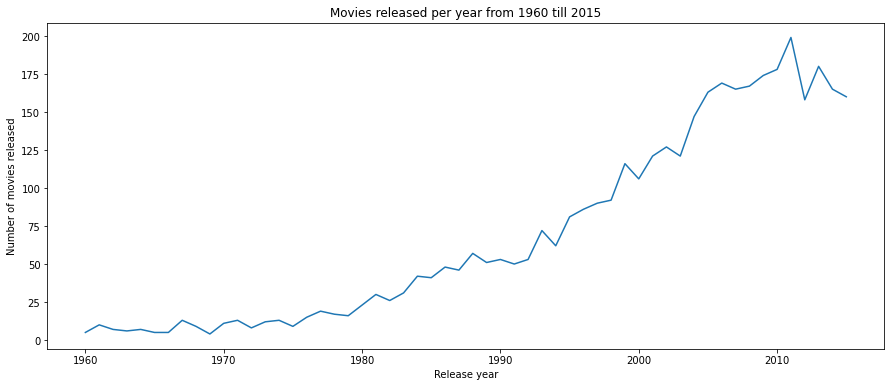

In [37]:
plt.plot(movies_release_year.release_year, movies_release_year.id) #creating the line plot
figure = plt.gcf() #getting the current plot
figure.set_size_inches(15, 6) #adjusting the size of the current plot
plt.title("Movies released per year from 1960 till 2015") 
plt.xlabel("Release year")
plt.ylabel("Number of movies released")
plt.show()

The line chart above clearly shows that the number of movies released per year has been steadily increasing, and has increased by about 1900% from 1960 till 2015.

### What is the relationship between movie runtime and movie rating?

To gain the insights which answer this question, I would create a scatter plot with a regression line, which shows the relationship between movie runtime and movie rating. The 'runtime' and 'vote_average' columns are to be used in the scatter plot.

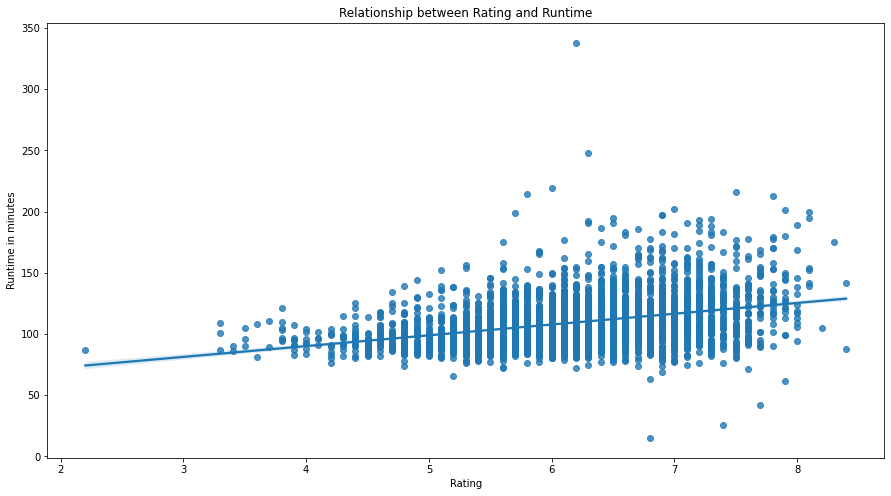

In [38]:
ax = sns.regplot(y="runtime", x = "vote_average", data=movies) #plotting the scatter plot.
figure = plt.gcf() #Getting the current plot
figure.set_size_inches(15, 8) #adjusting the size of the current plot
plt.title("Relationship between Rating and Runtime")
plt.xlabel("Rating")
plt.ylabel("Runtime in minutes")
plt.show()

In [39]:
#Calculating the correlation between runtime and rating
movies[["runtime", "vote_average"]].corr()

,runtime,vote_average
runtime,1.000000,0.351712
vote_average,0.351712,1.000000


This shows that the correlation between runtime and rating is 0.35. The correlation is relatively low, with the scatterplot representing a low positive relationship between the two variables.

### What is the distribution of movie popularity and rating(vote_average) in the dataset?

I would make use of histograms to represent the distribution of popularity and rating(vote_average). First of all, I would determine the distribution of popularity.

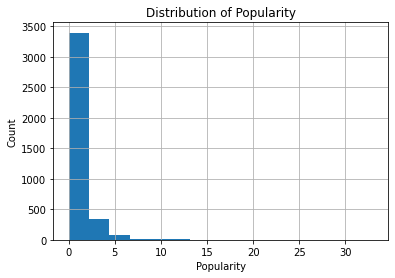

In [40]:
movies["popularity"].hist(bins=15)  #creating a histogram showing the distribution of popularity
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.title("Distribution of Popularity")
plt.show()

The histogram above shows that movies with lower popularity are more common, while movies with high popularity are rare.
Next, I would determine the distribution of vote_average(rating) using a histogram.

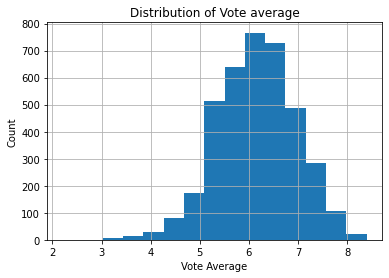

In [41]:
movies["vote_average"].hist(bins=15)  #creating a histogram showing the distribution of vote average(rating)
plt.xlabel("Vote Average")
plt.ylabel("Count")
plt.title("Distribution of Vote average")
plt.show()

The histogram above shows that the modal value of vote average is around 6.

<a id='conclusions'></a>
## Conclusions

Based on the EDA carried out above, the following conclusions can be drawn;

1. The most popular genres are science fiction, adventure, fantasy and animation.
2. The highly rated genres are documentary, war and history.
3. Genres that generate the highest revenues are animation, adventure, fantasy and family.
2. High revenue movies show a strong positive correlation with popularity and budget, and a weak positive correlation with rating.
3. The number of movies released per year has been steadily increasing, and has increased by about 1900% from 1960 till 2015.
4. There is a weak positive correlation between movie runtime and movie rating.
7. Movies with low popularity are more common in the dataset while movies with high popularity are rare.
8. The distribution of rating(vote_average) shows that the modal value of rating is around 6.


A large number of data points were removed during the cleaning process,<br>
either due to anomalies like nulls, duplicates, or the values of 0 in some columns.<br>This may pose as a
limitation to this analysis, as the results may not represent a high percentage of the population.